<a href="https://colab.research.google.com/github/Kavi-Dew-23/EG_2020_4338/blob/main/Diamond_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("../content/diamonds.csv")
data.head()
# printing the first 5 data from the dataset

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data.shape
# to print how many rows and columns are in the dataset

(53940, 11)

# Data Preprocessing

In [ ]:
data.info()
# Getting information of the data
# There is no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


The first column is an index "Unnamed". It likes a indexing column. So we are going to remove it.

In [ ]:
data = data.drop(["Unnamed: 0"], axis= 1)
# axis 1 means deleting the column
# axis 0 means the row
data.describe()
# description basically happen on numerical data


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
# x,y, and z values are cannot be zero. So that is not possible
# so we have to remove values such that x, y, and z values are zero. This is like an outliers or faulty values.
# Dropping dimentionless diamonds
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape


(53920, 10)

Pairplot of data
Pairplot is gives the relationship between every numerical column

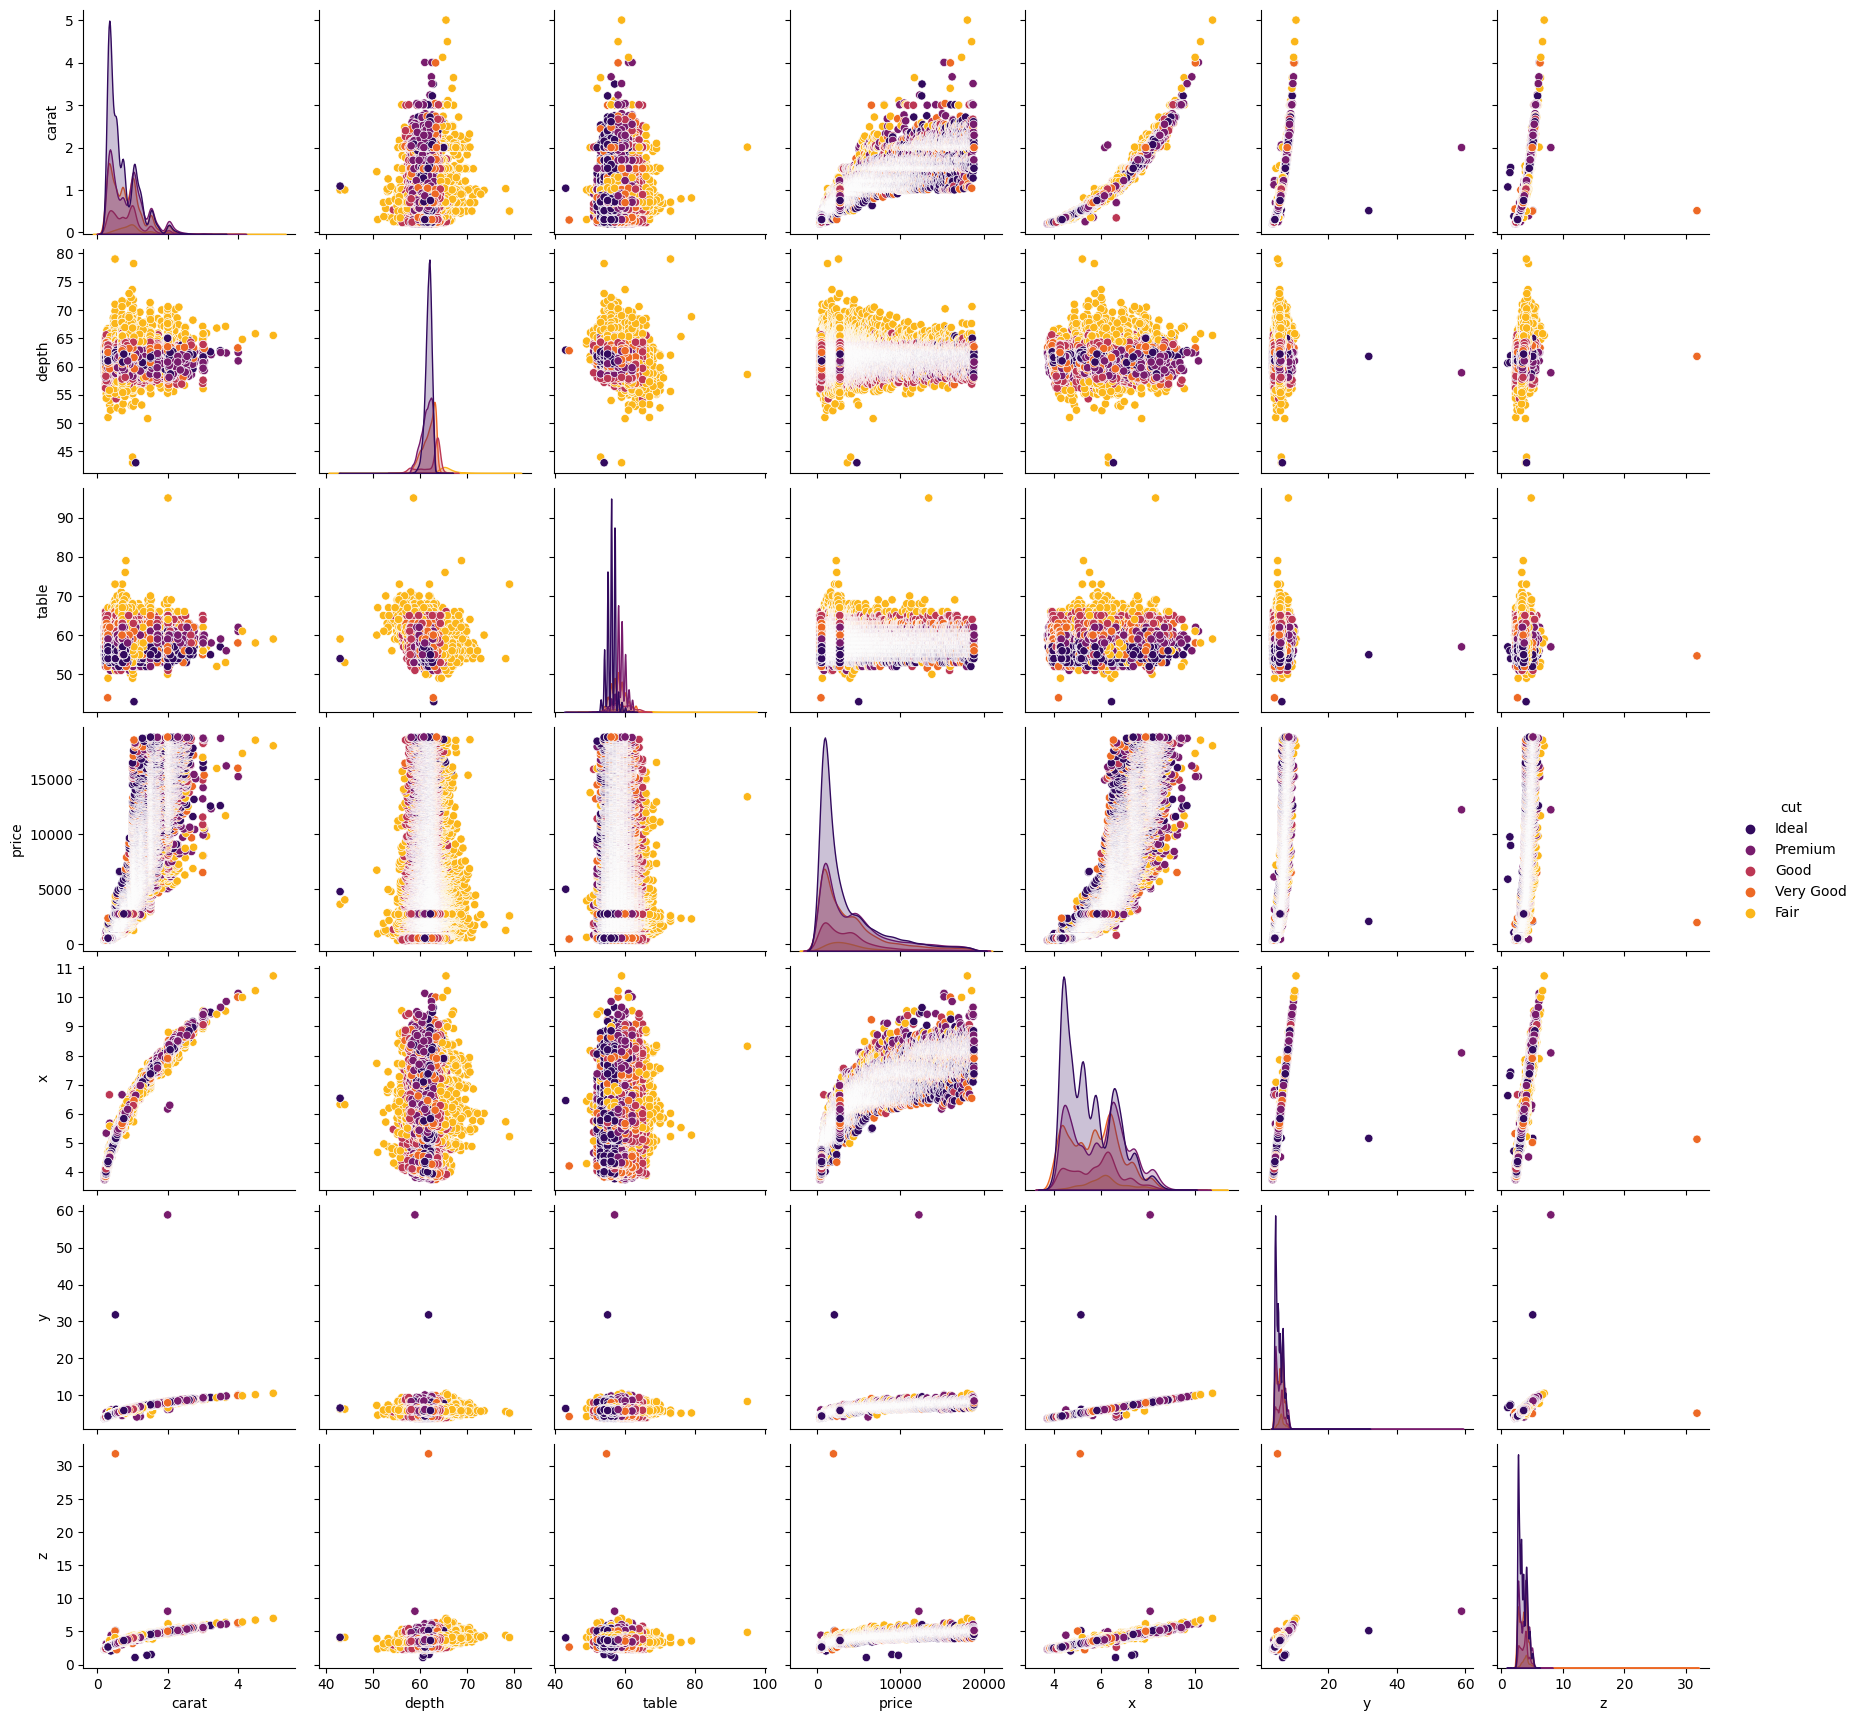

In [ ]:
shade = ["#835656", "#baa0a0", "#7ffc7c8", "#a9a799", "#65634a"] #shade for hue
ax = sns.pairplot(data, hue= "cut",palette="inferno") # use an inbuild palette

Here we can see there are outliers in the above graphs so we need to remove the outliers.
Here we used regression plot to take close look at the outliers.


Text(0.5, 1.0, 'Regression line on Price vs y')

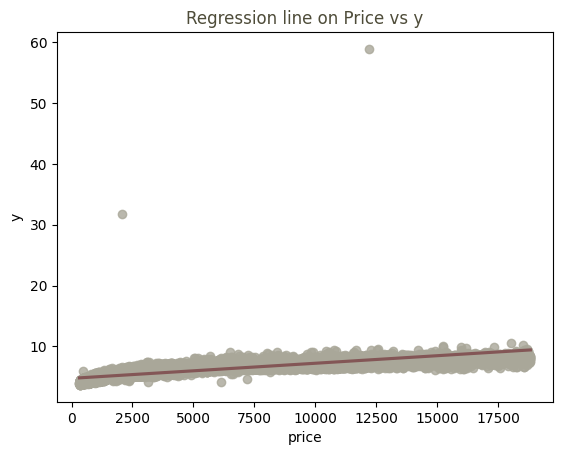

In [ ]:
ax = sns.regplot(x="price", y = "y", data=data, fit_reg= True, scatter_kws={"color" : "#a9a799"} , line_kws= {"color" : "#835656"})
ax.set_title("Regression line on Price vs y", color ="#4e4c39")

Text(0.5, 1.0, 'Regression line on Price vs z')

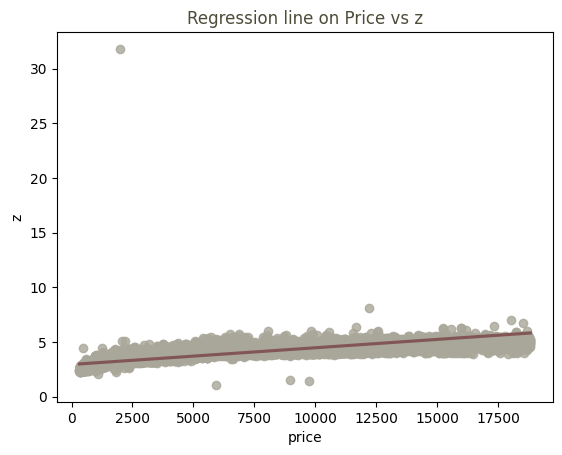

In [ ]:
ax = sns.regplot(x="price", y = "z", data=data, fit_reg= True, scatter_kws={"color" : "#a9a799"} , line_kws= {"color" : "#835656"})
ax.set_title("Regression line on Price vs z", color ="#4e4c39")

Text(0.5, 1.0, 'Regression line on Price vs Depth')

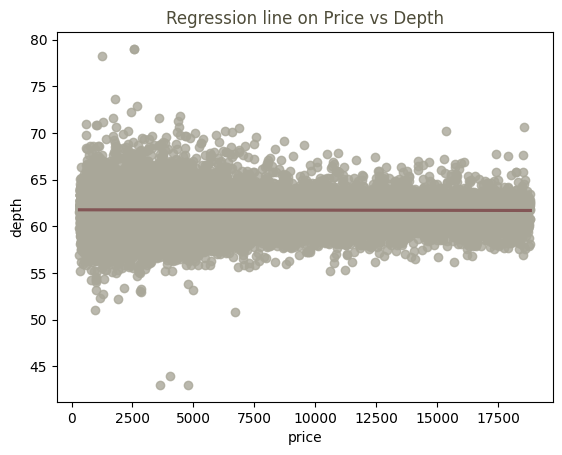

In [ ]:
ax = sns.regplot(x="price", y = "depth", data=data, fit_reg= True, scatter_kws={"color" : "#a9a799"} , line_kws= {"color" : "#835656"})
ax.set_title("Regression line on Price vs Depth", color ="#4e4c39")
# can get 75 as upper boundry line and 45 as lower boundry line

Text(0.5, 1.0, 'Regression line on Price vs Table')

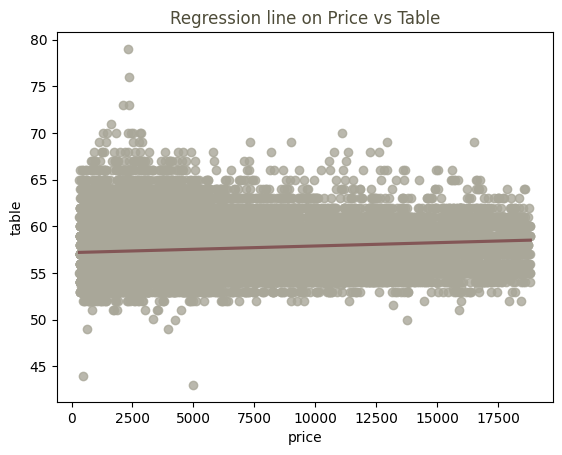

In [ ]:
ax = sns.regplot(x="price", y = "table", data=data, fit_reg= True, scatter_kws={"color" : "#a9a799"} , line_kws= {"color" : "#835656"})
ax.set_title("Regression line on Price vs Table", color ="#4e4c39")
# can take 80 or 90 as one boundry line and 50 as other boundry line

As we get to know about the outliers. Now we will remove the outliers


In [ ]:
data = data[(data["depth"] < 75) & (data["depth"] > 45)]
data = data[(data["table"] < 80) & (data["depth"] > 50)]
data = data[(data["x"] < 30)]
data = data[(data["y"] < 30)]
data = data[(data["z"] < 30) & (data["z"] > 2)]
data.shape




(53907, 10)

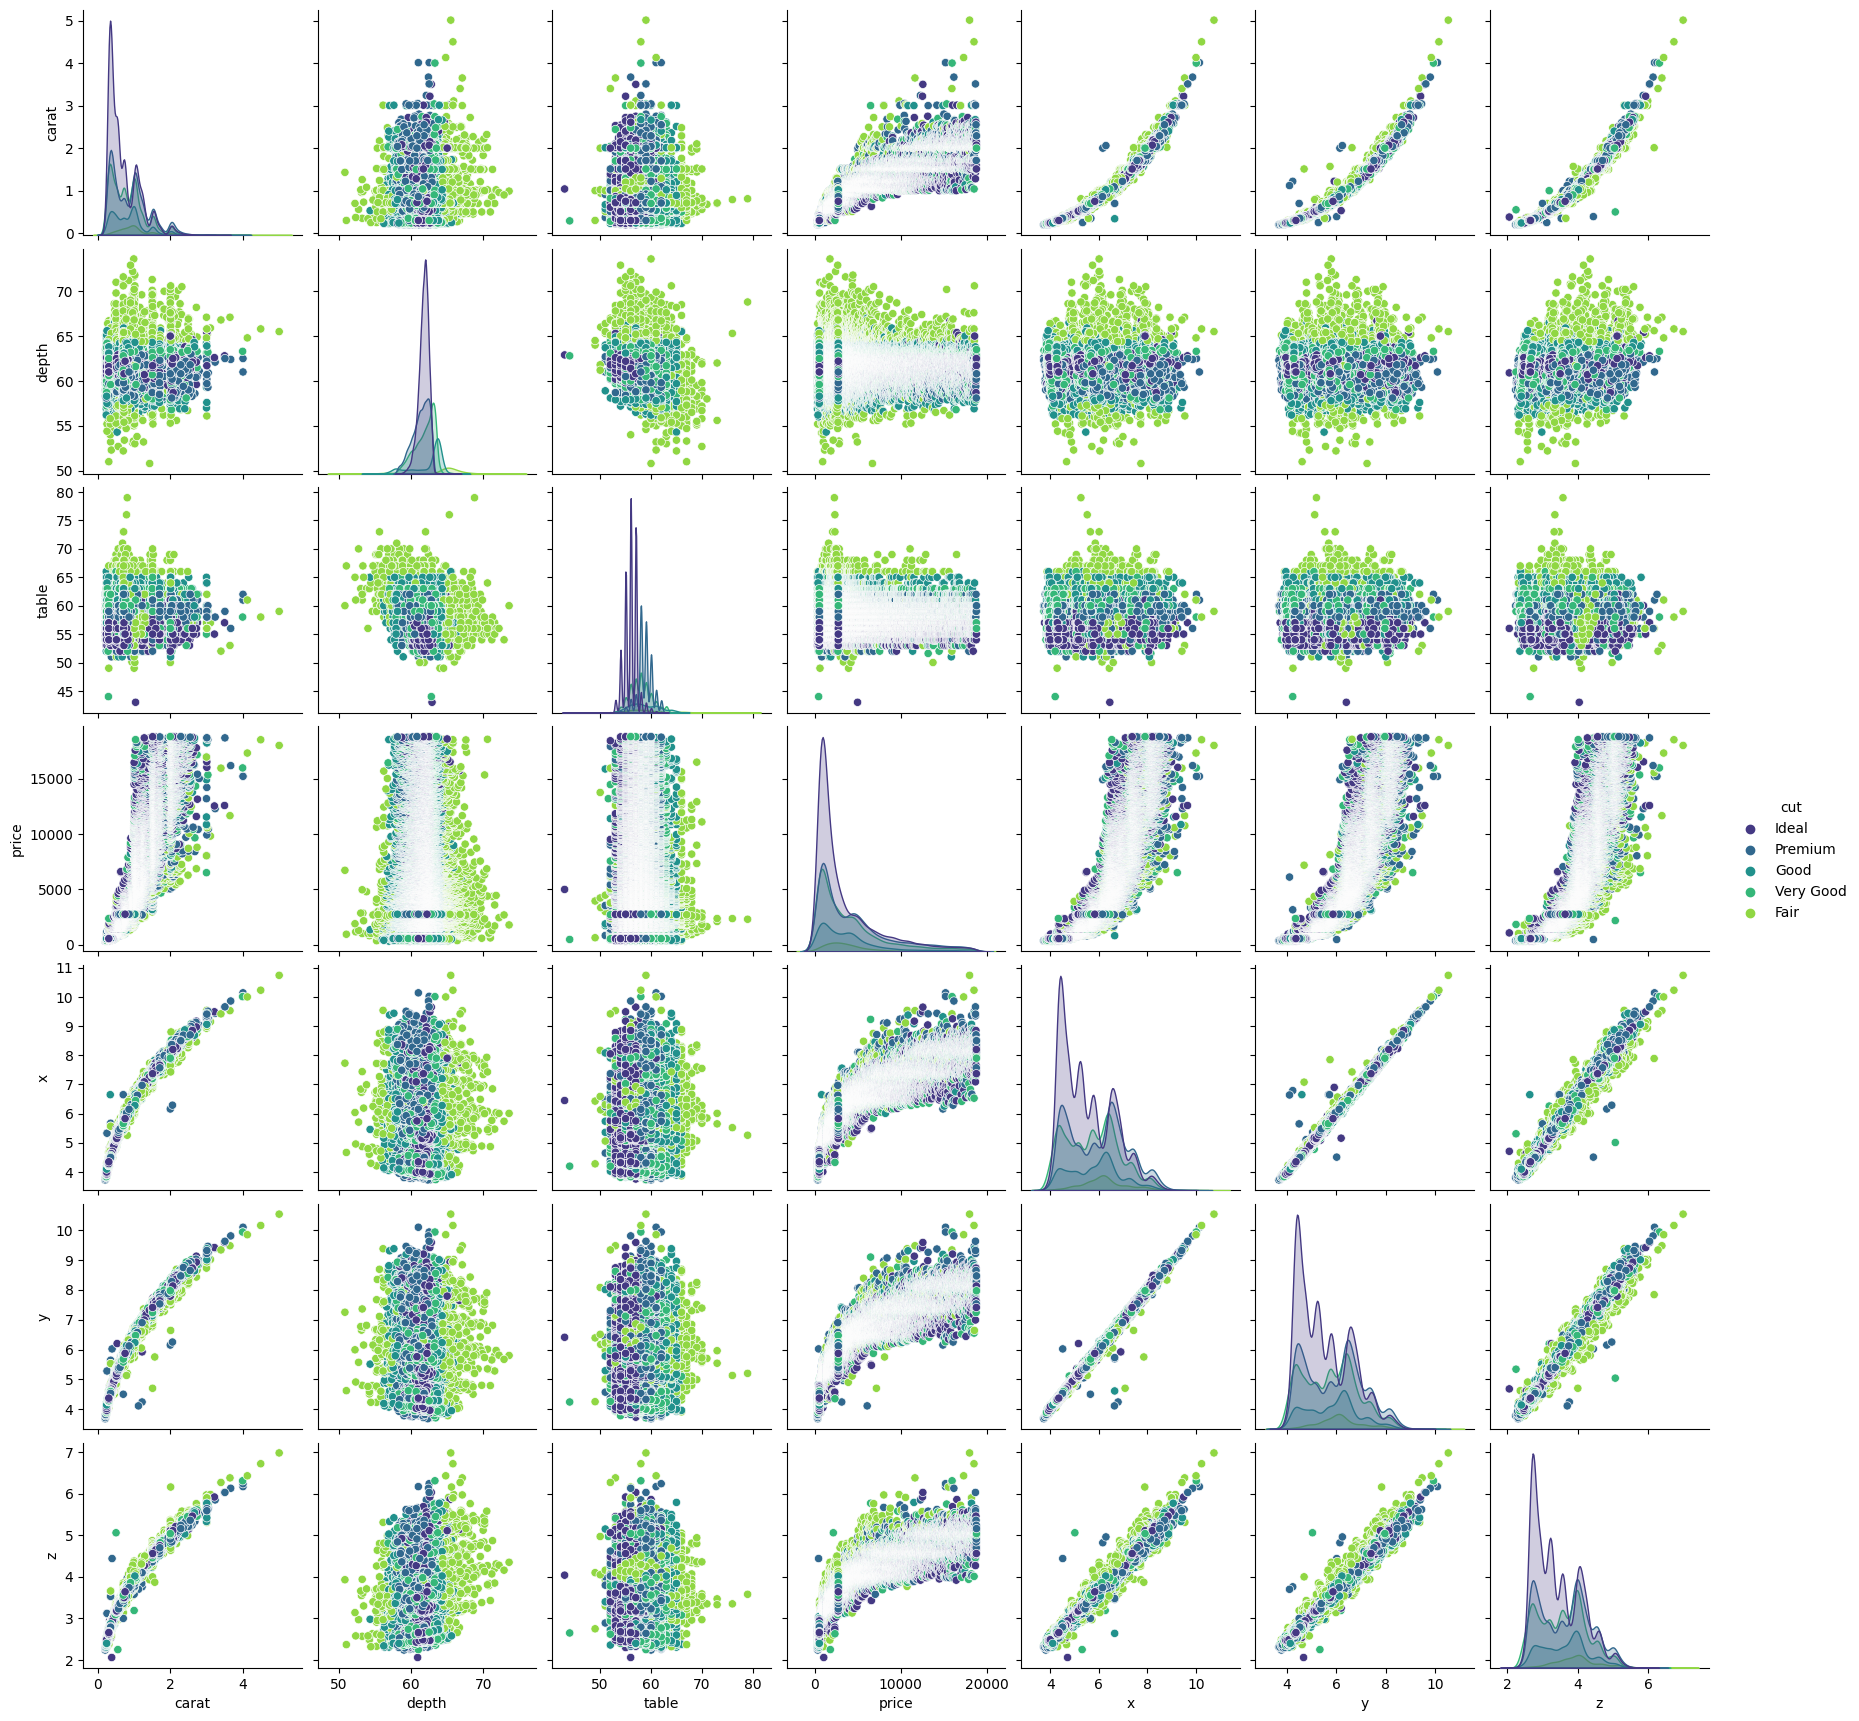

In [ ]:
ax = sns.pairplot(data, hue="cut", palette="viridis")
# Now we can see regression without outliers or useless points so that it helps to see very good relationship between columns

Now the data set is clear. Now we should deal with categorical variables such as color, cut and clarity.

In [ ]:
# print the list of categorical variables
# categoricals variables are the variables which are not in the data type of int or float.
s = (data.dtypes == "object")
object_cols = list(s[s].index)
print("Categorical Variables")
print(object_cols)

Categorical Variables
['cut', 'color', 'clarity']


Plotting each and every categorical data vs price by using violin plot. Violin plots are used to represent comparison of a variable distribution across different categories.

Text(0.5, 0, 'Cut')

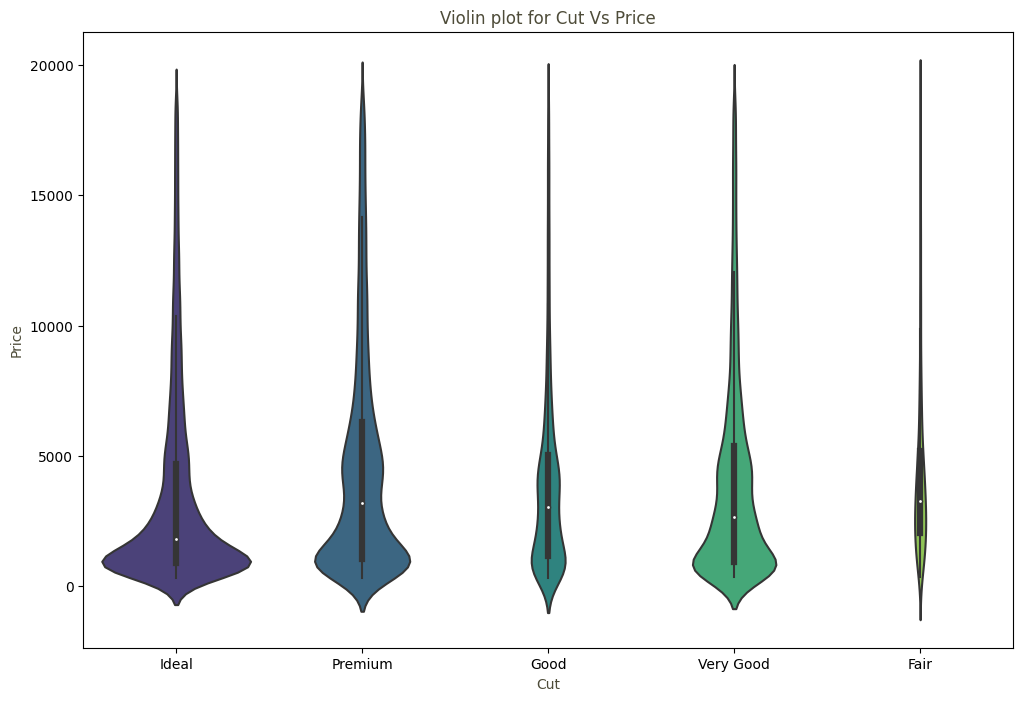

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x = "cut", y = "price", data=data, palette="viridis", scale="count")
ax.set_title("Violin plot for Cut Vs Price", color = "#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Cut", color="#4e4c39")

Text(0.5, 0, 'Color')

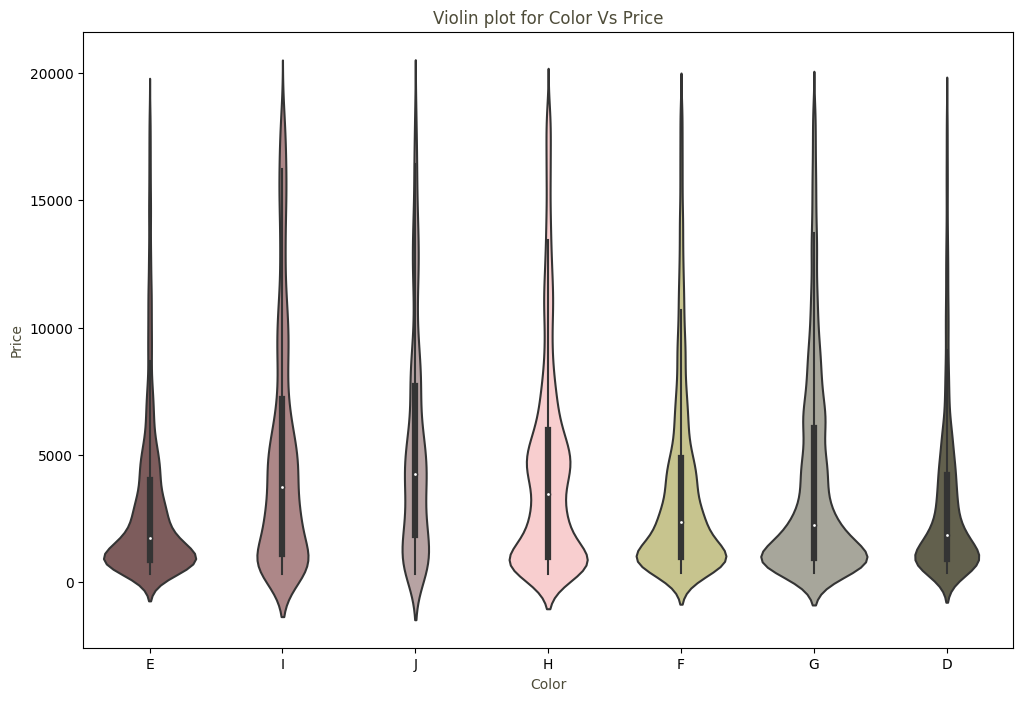

In [ ]:
plt.figure(figsize=(12,8))
shade_1 = ["#835656", "#b38182", "#baa0a0", "#ffc7c8", "#d0cd85", "#a9a799", "#65634a"]
ax = sns.violinplot(x = "color", y = "price", data=data, palette=shade_1, scale="count")
ax.set_title("Violin plot for Color Vs Price", color = "#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Color", color="#4e4c39")

Text(0.5, 0, 'Clarity')

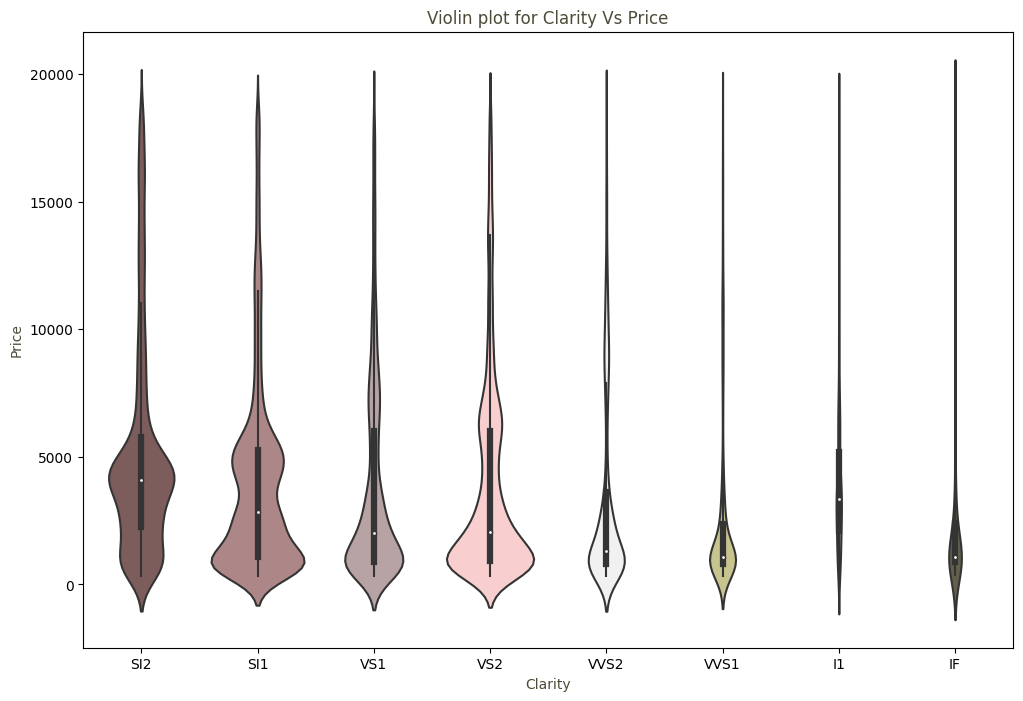

In [ ]:
plt.figure(figsize=(12,8))
shade_2 = ["#835656", "#b38182", "#baa0a0", "#ffc7c8", "#f1f1f1", "#d0cd85", "#a9a799", "#65634a"]
ax = sns.violinplot(x = "clarity", y = "price", data=data, palette=shade_2, scale="count")
ax.set_title("Violin plot for Clarity Vs Price", color = "#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Clarity", color="#4e4c39")

Completed data visualization.




Now use label encoder to encode these categories into numerical data.




In [ ]:
from sklearn.preprocessing import LabelEncoder

# Make a copy to avoid changes to the original data
label_data = data.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols: # contains all the column which contain object data types
    label_data[col] = label_encoder.fit_transform(label_data[col])

# Display the modified data
label_data.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data.describe()

,carat,depth,table,price,x,y,z
count,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000
mean,0.797628,61.749741,57.455948,3930.584470,5.731463,5.733292,3.539441
std,0.473765,1.420119,2.226153,3987.202815,1.119384,1.111252,0.691434
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


<Axes: >

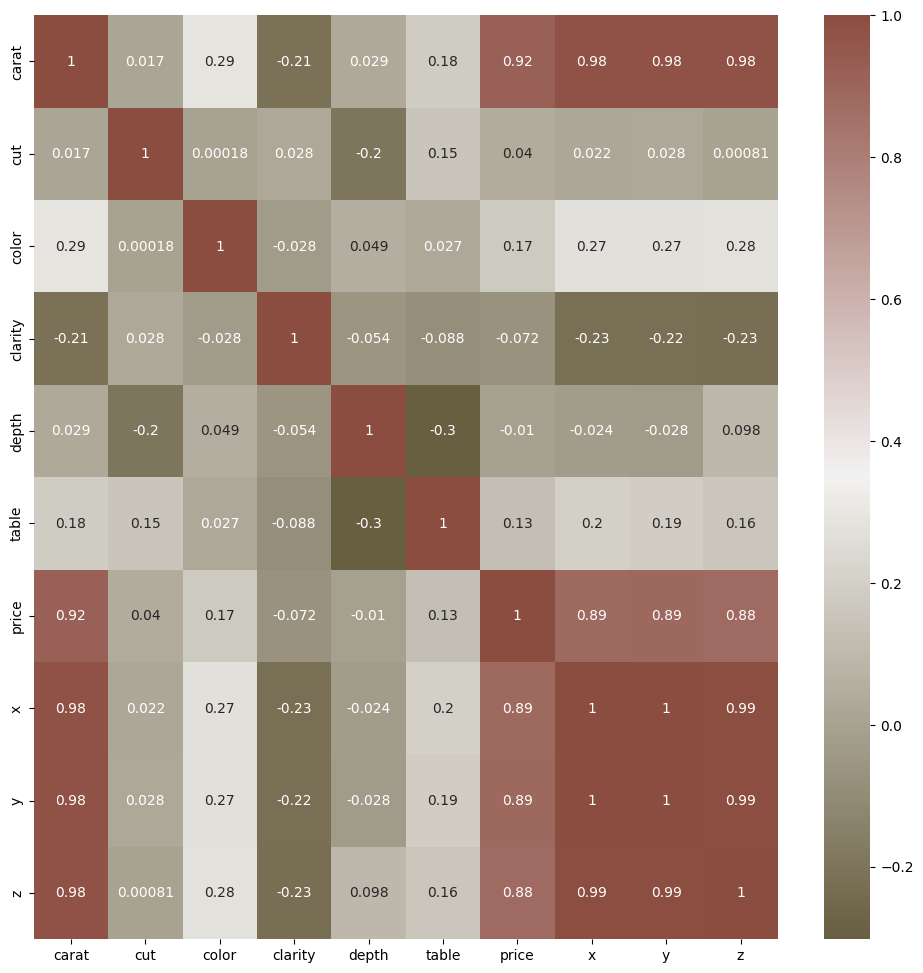

In [ ]:
#printing a correlation matrix by using heat map
cmap =sns.diverging_palette(70,20,s=50, l=40, n=6, as_cmap = True)
corrmat = label_data.corr()
f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True)

From the above heat map it shows that x, y and z are having a very good relationship between themselves.

x,y and z shows a high correlation to the target column.

"depth", "cut" and "table" shows low correlation.




# Model Building

Steps involved in model Building

*   Setting up features and target
*   Build a pipeline of standard scaler and model for five different regressors.
*   Fit all the models on training data
*   Get mean of cross-validation on the training set for all the models for negative mean square error.
*   Pick the model with best cross validation score.
*   Fit the best model on the training set and get.









In [ ]:
# Split the data set into training and testing set
from sklearn.model_selection import train_test_split
# Assigning the feature as X and target as y

X = label_data.drop(["price"], axis=1)
#As x contains independent variable the price variable going to be drop
y = label_data["price"] # y contains predictive class
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 7)
#spliting the dataset

Implement the pipeline for different models.
In the pipeline we have to use the standard scaler in order to standardize the data because we are  using regression technique.

Pipeline is the list which used to store the data for every model.


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Building the pipeline of standard scaler
pipeline_lr = Pipeline([("scalar1", StandardScaler()), # Step 1: Standardize the features using StandardScaler
                        ("lr_classifier", LinearRegression())]) # Step 2: Apply Linear Regression

pipeline_dt = Pipeline([("scalar2", StandardScaler()),
                        ("dt_classifier", DecisionTreeRegressor())])

pipeline_rf = Pipeline([("scalar3", StandardScaler()),
                        ("rf_classifier", RandomForestRegressor())])

pipeline_kn = Pipeline([("scalar4", StandardScaler()),
                        ("kn_classifier", KNeighborsRegressor())])

pipeline_xgb = Pipeline([("scalar5", StandardScaler()),
                        ("xgb_classifier", XGBRegressor())])

# pipeline is the list which going to store all data for each and every model
# List of all pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for each of reference.
pipe_dict = {0: "LinearRegression", 1:"DecisionTree", 2:"RandomForest", 3:"KNeighbors", 4:"XGBRegressor"}

# Fit the pipeline with training data
for pipe in pipelines:
  pipe.fit(X_train, y_train)

# Every model has fitted with training data

In [ ]:
# See the cross validation score and identify which model perfoms the best
from sklearn.model_selection import cross_val_score

cv_results_rms = []
for i, model in enumerate(pipelines):
  cv_score = cross_val_score(model, X_train, y_train, scoring="neg_root_mean_squared_error", cv = 10)
  cv_results_rms.append(cv_score)
  print("%s: %f " %(pipe_dict[i], cv_score.mean()))

# get the scores for every regression technique
# XGB gives the best score
# Negative root mean squared error (neg RMSE) is a performance metric used in regression
# tasks to evaluate the accuracy of a predictive model.

LinearRegression: -1348.811824 
DecisionTree: -753.802113 
RandomForest: -548.996712 
KNeighbors: -823.648809 
XGBRegressor: -547.645088 


# Prediction for the testing data

## Testing the model with the best score on the test set

As above results it can be seen that XGBRegressor classifier is the model with the best scoring on negative root mean square error.
So now lets test this model on a test set and evaluate it with different parameter.


In [ ]:
# Model prediction on test data
pred = pipeline_xgb.predict(X_test)

# Save the prediction in pred variable


In [ ]:
# Model Evaluation
from sklearn import metrics

print("R^2:",metrics.r2_score(y_test, pred))
# Calculates and prints the R-squared (R²) score.
# R-squared is a measure of how well the predicted values match the actual values.

print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
# Calculates and prints the adjusted R-squared score
#  Adjusted R-squared takes into account the number of predictors in the model and adjusts the R-squared accordingly.

print("MAE:",metrics.mean_absolute_error(y_test, pred)) # Calculates and prints the Mean Absolute Error (MAE).
# MAE represents the average absolute difference between the predicted and actual values.
# It provides a measure of the average magnitude of errors without considering their direction.

print("MSE:",metrics.mean_squared_error(y_test, pred)) # Calculates and prints the Mean Squared Error (MSE).
#  MSE represents the average of the squared differences between the predicted and actual values.

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred))) # Calculates and prints the Root Mean Squared Error (RMSE).
# RMSE is the square root of MSE and is expressed in the same units as the target variable.
# It provides a more interpretable measure of the average magnitude of errors.



R^2: 0.9803842673897721
Adjusted R^2: 0.9803711581899881
MAE: 280.1733446465832
MSE: 307728.16599314264
RMSE: 554.7325175191577
